In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy, scipy as sklearn, librosa, urllib
import librosa.display
from IPython.display import Audio
import json 
import seaborn as sns
from sklearn.cluster import KMeans
import csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score
import keras
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler
from os import path

from itertools import cycle
from sklearn.manifold import TSNE
from sklearn.metrics import roc_curve, auc, silhouette_score,roc_auc_score, precision_recall_fscore_support
from tqdm import tqdm
import opensmile


In [115]:
labels = ["guilt", "digust", "happiness", "fear", "anger", "surprise", "sadness", "neutral"]

In [69]:
def setLabel(i): 
    
    emotions = {
    'col' : 'guilt',
    'dis' :'disgust',
    'gio' : 'happiness',
    'pau' : 'fear',
    'rab' : 'anger',
    'sor' : 'surprise',
    'tri' : 'sadness',
    'neu' : 'neutral'
    }

    return emotions[i[:3]]

with open("DEMoS/data.csv", 'r+') as f:
    f.truncate(0)

main_dir = "DEMoS"
with open('DEMoS/data.csv', 'w', newline='') as csvfile:
    fieldnames = ['file_name', 'label','actor']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()

    for index,dir in enumerate(os.listdir(main_dir)):
        actual = os.path.join(main_dir,dir)
        if dir.endswith(".csv") or dir.endswith(".pkl") :
            continue
        if "m" in dir: 
            actor = "m" + str((index//2) +1)
        else:
            actor = "f" + str((index//2) +1)

        emo = str(dir.split("_")[-1])
        # for audio in os.listdir(actual):
        writer.writerow({'file_name':dir,'label':setLabel(emo),'actor':actor})

In [2]:
data_df = pd.read_csv("DEMoS/data.csv")
# data_df.drop(data_df[data_df['label'] == "calm"].index, inplace = True)
# data_df = data_df.reset_index()

In [3]:
def get_max_min(files):
    min_, max_ = 100, 0
    for file in files:
        sound_file, samplerate = librosa.load(file)
        t = sound_file.shape[0] / samplerate
        if t < min_:
            min_ = t
        if t > max_:
            max_ = t

    return max_, min_

In [6]:
def return_features(file,pad):
    X, sample_rate = librosa.load(file)
    max_ = X.shape[0] / sample_rate
    if max_ < pad:
        length = (pad * sample_rate) -  (X.shape[0] / sample_rate)
        X = librosa.util.pad_center(X, size = length, mode = 'constant')
    smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.eGeMAPSv02,
    feature_level=opensmile.FeatureLevel.LowLevelDescriptors,
    )
    y = smile.process_signal(X,sample_rate)
    #  smile.process_file(file, end=3)
    return y
def get_max_min(files):
    min_, max_ = 100, 0
    for file in files:
        sound_file, samplerate = librosa.load(file)
        t = sound_file.shape[0] / samplerate
        if t < min_:
            min_ = t
        if t >= max_:
            max_ = t

    return np.round(max_,2) + 0.01, min_

In [8]:
train_data = pd.DataFrame(columns=['filename', 'features', 'label'])
max, min = get_max_min('DEMoS/'+data_df.file_name)
features = []
for index, file in tqdm(zip(data_df.index, data_df.file_name)):
    train_data.loc[index] = [file, return_features('DEMoS/'+file,max), data_df.label[index]]

9697it [22:24,  7.21it/s]


In [2]:
clear_df=pd.read_pickle('clear.pkl')
semi_aug_df=pd.read_pickle('semi_aug_df.pkl')
aug_df=pd.read_pickle('aug_df.pkl')

In [36]:
female = []
male = []

for name in semi_aug_df["filename"]:
    if "f" in name:
        female.append(name)
    else:
        male.append(name)

In [ ]:
semi_aug_df[""]

In [51]:
mask = semi_aug_df['filename'].isin(male)
males = semi_aug_df[mask].reset_index()

In [ ]:
semi_aug_df[semi_aug_df["filename"] == "f_01_neu00a.wav"].index

Index([0, 9697, 19394], dtype='int64')

In [81]:
semi_aug_df["filename"].loc[idxte]

9363    PR_m_53_col05c.wav
6186    NP_m_41_dis04b.wav
6985    NP_m_58_pau03b.wav
1088    NP_f_37_rab00a.wav
7000    NP_m_58_rab01b.wav
               ...        
8952    PR_m_23_col00a.wav
5888    NP_m_33_tri00a.wav
6521    NP_m_50_rab13b.wav
7620    NP_m_65_dis07b.wav
8982    PR_m_23_tri06b.wav
Name: filename, Length: 1940, dtype: object

In [84]:
semi_aug_df["filename"].loc[idx_test]

19060    PR_m_53_col05c.wav
15883    NP_m_41_dis04b.wav
16682    NP_m_58_pau03b.wav
10785    NP_f_37_rab00a.wav
16697    NP_m_58_rab01b.wav
                ...        
18649    PR_m_23_col00a.wav
15585    NP_m_33_tri00a.wav
16218    NP_m_50_rab13b.wav
17317    NP_m_65_dis07b.wav
18679    PR_m_23_tri06b.wav
Name: filename, Length: 1940, dtype: object

In [80]:
import math 

for x in (semi_aug_df["filename"].loc[idxte] - semi_aug_df["filename"].loc[idx_test]):
    # if not math.isnan(x):
        print(x)

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


In [70]:
(semi_aug_df["filename"].loc[0])

'f_01_neu00a.wav'

In [72]:
list(semi_aug_df["filename"].loc[:9696])[-1]

'PR_m_69_tri19c.wav'

In [108]:
data_classes = (list((semi_aug_df["label"].unique())))
Y = keras.utils.to_categorical(list((semi_aug_df["label"].apply(data_classes.index))))
X = np.expand_dims(np.stack(semi_aug_df["features"]),3)
indexes = np.arange(9696)
X_t, X_test, y_t, y_test = train_test_split(X[:9696],Y[:9696], test_size=0.2, random_state=22)


idxt, idxte = train_test_split(indexes, test_size=0.2, random_state=22)
aug = X[9697:]
aug_y = Y[9697:]
idx_train = idxt + 9696
X_train = np.concatenate([X_t,aug[idx_train]])
y_train = np.concatenate([y_t,aug_y[idx_train]])
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=22)
# fin = [x for x in idx_t if x not in terst]

In [8]:
def split_train_test_val(train_data):
    data_classes = (list((train_data["label"].unique())))
    Y = keras.utils.to_categorical(list((train_data["label"].apply(data_classes.index))))
# X = np.concatenate([X1,X2,X3,X4], axis=2)
    X = np.expand_dims(np.stack(train_data["features"]),3)


    
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=22)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=22)
    return X_train, X_val, X_test, y_train, y_val, y_test

In [10]:
model = keras.models.load_model("model\SER_DEMoS_28_10_2024_12_21_34.keras")
X_train, X_val, X_test, y_train, y_val, y_test = split_train_test_val(clear_df)

print(f"Loss : {model.evaluate(X_test,y_test)[0]}, Accuracy : {model.evaluate(X_test,y_test)[1]}")

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\anton\AppData\Local\Temp\ipykernel_812\2865981763.py:1: SyntaxWarning: invalid escape sequence '\S'
  model = keras.models.load_model("model\SER_DEMoS_28_10_2024_12_21_34.keras")


31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step - accuracy: 0.3812 - loss: 1.6627
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - accuracy: 0.3812 - loss: 1.6627
Loss : 1.6657058000564575, Accuracy : 0.3835051655769348


In [30]:
test = []
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

In [31]:
for i in range(8):
    print(test.count(i))

86
357
495
447
291
468
295
470


In [109]:
def get_cnn(input_shape):
    model = keras.Sequential()

    model.add(keras.layers.Input(shape=input_shape))

    model.add(keras.layers.Conv2D(256, 3, activation='relu' ))
    model.add(keras.layers.MaxPooling2D(padding='same'))
    model.add(keras.layers.Dropout(rate=0.3))

    model.add(keras.layers.Conv2D(128, 3, activation='relu'))
    model.add(keras.layers.MaxPooling2D(padding='same'))
    model.add(keras.layers.Dropout(rate=0.3))


    model.add(keras.layers.Conv2D(64, 3, activation='relu'))
    model.add(keras.layers.MaxPooling2D(padding='same'))
    model.add(keras.layers.Dropout(rate=0.3))

    model.add(keras.layers.GlobalAveragePooling2D())
    model.add(keras.layers.Dense(1024, activation='relu'))
    
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(keras.layers.Dense(64, activation='relu'))

    model.add(keras.layers.Dense(8, activation='softmax'))

    optimzer = keras.optimizers.Adam()
    model.compile(loss='categorical_crossentropy', optimizer=optimzer, metrics=['accuracy'])

    return model

In [110]:
from datetime import datetime  
name = datetime.now().strftime("model/SER_DEMoS_testclear_%d_%m_%Y_%H_%M_%S.keras")  

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath = name,
        save_best_only=True,
        verbose=1,
        monitor="val_loss"),

    keras.callbacks.EarlyStopping(  
        monitor="val_loss",
        min_delta=0.01,
        patience=3,
        verbose=1,
        mode="auto",
        restore_best_weights=True
    )
]


# X_train, X_val, X_test, y_train, y_val, y_test = split_train_test_val(semi_aug_df)

model = get_cnn((X_train.shape[1:]))
model.summary()

history = model.fit(X_train, y_train, 
                       validation_data=(X_val,y_val), 
                       batch_size=32,
                       epochs=1000,
                       callbacks=callbacks)


print(f"Loss : {model.evaluate(X_test,y_test)[0]}, Accuracy : {model.evaluate(X_test,y_test)[1]}")

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 593, 23, 256)   │         2,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 297, 12, 256)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 297, 12, 256)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 295, 10, 128)   │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 148, 5, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 148, 5, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 146, 3, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 73, 2, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 73, 2, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 717,320 (2.74 MB)

 Trainable params: 717,320 (2.74 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000
388/388 ━━━━━━━━━━━━━━━━━━━━ 0s 507ms/step - accuracy: 0.1687 - loss: 3.9783
Epoch 1: val_loss improved from inf to 2.04138, saving model to model/SER_DEMoS_testclear_31_10_2024_13_54_21.keras
388/388 ━━━━━━━━━━━━━━━━━━━━ 213s 543ms/step - accuracy: 0.1687 - loss: 3.9743 - val_accuracy: 0.1850 - val_loss: 2.0414
Epoch 2/1000
388/388 ━━━━━━━━━━━━━━━━━━━━ 0s 544ms/step - accuracy: 0.1908 - loss: 1.9958
Epoch 2: val_loss improved from 2.04138 to 2.00159, saving model to model/SER_DEMoS_testclear_31_10_2024_13_54_21.keras
388/388 ━━━━━━━━━━━━━━━━━━━━ 225s 581ms/step - accuracy: 0.1908 - loss: 1.9957 - val_accuracy: 0.2143 - val_loss: 2.0016
Epoch 3/1000
388/388 ━━━━━━━━━━━━━━━━━━━━ 0s 520ms/step - accuracy: 0.2090 - loss: 1.9806
Epoch 3: val_loss improved from 2.00159 to 1.99506, saving model to model/SER_DEMoS_testclear_31_10_2024_13_54_21.keras
388/388 ━━━━━━━━━━━━━━━━━━━━ 253s 558ms/step - accuracy: 0.2090 - loss: 1.9806 - val_accuracy: 0.2121 - val_loss: 1.9951
Epoch 4/100

In [69]:
model = keras.models.load_model("model/SER_DEMoS_31_10_2024_08_06_40.keras")

print(f"Loss : {model.evaluate(X_test,y_test)[0]}, Accuracy : {model.evaluate(X_test,y_test)[1]}")



61/61 ━━━━━━━━━━━━━━━━━━━━ 8s 120ms/step - accuracy: 0.8662 - loss: 0.4121
61/61 ━━━━━━━━━━━━━━━━━━━━ 8s 124ms/step - accuracy: 0.8662 - loss: 0.4121
Loss : 0.4099574685096741, Accuracy : 0.8639175295829773


In [85]:
_y_pred = model.predict(X_test)

y_pred = []
for i in range(len(_y_pred)):
    y_pred.append(np.argmax(_y_pred[i]))
_y_test = []
for i in range(len(y_test)):
    _y_test.append(np.argmax(y_test[i]))

91/91 ━━━━━━━━━━━━━━━━━━━━ 14s 154ms/step


array([[ 56,   2,   5,   4,   3,   6,   7,   3],
       [  4, 257,  19,  25,   7,   3,   8,  34],
       [  7,  16, 387,  28,  16,  24,   3,  14],
       [  8,   9,  14, 356,  12,  15,  15,  18],
       [  9,  14,  10,  13, 214,  14,   9,   8],
       [  5,   4,  32,  16,  16, 354,  15,  26],
       [  6,   7,  12,  14,   3,  10, 234,   9],
       [ 14,  11,  13,  31,  13,  11,  11, 366]], dtype=int64)

Text(50.722222222222214, 0.5, 'True Label')

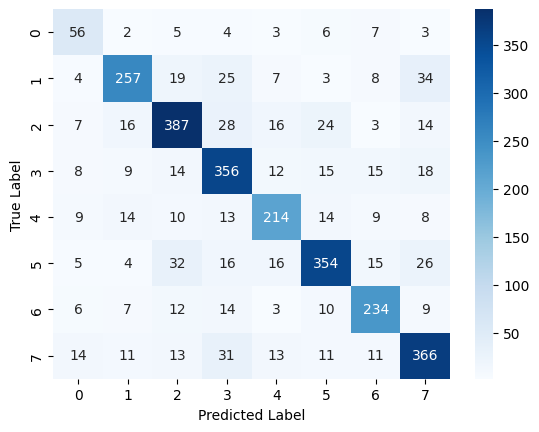

In [ ]:
cm = confusion_matrix(_y_test, y_pred)

g = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
g.xaxis.set_ticklabels(labels, rotation = 15,fontsize=12)
g.yaxis.set_ticklabels(labels, rotation = 30,fontsize=12)
g.set_xlabel("Predicted Label", fontsize=14)
g.set_ylabel("True Label", fontsize = 14)
g.set_title(data, fontsize = 18)

In [5]:
X_train, X_val, X_test, y_train, y_val, y_test = split_train_test_val(semi_aug_df)

X_train_sq = np.squeeze(X_train)
X_val_sq = np.squeeze(X_val)
X_test_sq = np.squeeze(X_test)

In [6]:
from keras import layers, models
def get_model(input_shape):
    inputs = layers.Input(shape=input_shape)
    encoder = layers.LSTM(128)(inputs)
    drop = layers.Dropout(0.3)(encoder)
    hidden = layers.Dense(32, activation='relu')(drop)
    outputs = layers.Dense(8, activation='softmax')(hidden)
    
    model = models.Model(inputs, outputs)
    optimizer = keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=["accuracy"])

    return model

In [7]:
LSTM_model = get_model((X_train_sq.shape[1:]))
LSTM_model.summary()


from datetime import datetime  
name = datetime.now().strftime("ser_lstm_%d_%m_%Y_%H_%M_%S.keras")  

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath = name,
        save_best_only=True,
        verbose=1,
        monitor="val_loss"),

    keras.callbacks.EarlyStopping(  
        monitor="val_loss",
        min_delta=0.001,
        patience=20,
        verbose=1,
        mode="auto",
        restore_best_weights=True
    )
]


LSTM_history = LSTM_model.fit(X_train_sq, y_train, 
                       validation_data=(X_val_sq,y_val), 
                       batch_size=32,
                       epochs=1000,
                       verbose=1,
                       callbacks=callbacks)


print(f"Loss : {LSTM_model.evaluate(X_test_sq,y_test)[0]}, Accuracy : {LSTM_model.evaluate(X_test_sq,y_test)[1]}")

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 595, 25)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │        78,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           264 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83,240 (325.16 KB)

 Trainable params: 83,240 (325.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000
655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.1615 - loss: 2.0452
Epoch 1: val_loss improved from inf to 2.01492, saving model to ser_lstm_30_10_2024_09_51_48.keras
655/655 ━━━━━━━━━━━━━━━━━━━━ 98s 148ms/step - accuracy: 0.1615 - loss: 2.0452 - val_accuracy: 0.1822 - val_loss: 2.0149
Epoch 2/1000
655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.1699 - loss: 2.0154
Epoch 2: val_loss improved from 2.01492 to 2.01392, saving model to ser_lstm_30_10_2024_09_51_48.keras
655/655 ━━━━━━━━━━━━━━━━━━━━ 101s 154ms/step - accuracy: 0.1699 - loss: 2.0154 - val_accuracy: 0.1822 - val_loss: 2.0139
Epoch 3/1000
655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.1730 - loss: 2.0167
Epoch 3: val_loss did not improve from 2.01392
655/655 ━━━━━━━━━━━━━━━━━━━━ 100s 153ms/step - accuracy: 0.1730 - loss: 2.0167 - val_accuracy: 0.1822 - val_loss: 2.0147
Epoch 4/1000
655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.1716 - loss: 2.0155
Epoch 4: val_loss did not imp

In [ ]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X.squeeze(3), Y, test_size=0.1, random_state=22)

X_train = X_train.reshape(X_train.shape[0],-1)
X_test = X_test.reshape(X_test.shape[0],-1)

SVC_model = SVC(kernel = 'rbf', gamma = 'auto', probability = True, verbose=True)

SVC_history = SVC_model.fit(X_train, np.argmax(y_train,axis=-1))
SVC_model.score(X_test,np.argmax(y_test,axis=-1))

[LibSVM]

In [3]:
#add white noise to the original signal
def noise_addition(data,noise_percentage_factor=0.035):
    noise = np.random.normal(0, data.std(), data.size)
    augmented_data = data + noise * noise_percentage_factor
    return augmented_data

#lower the pitch of the original signal
def pitch_scaling(data, sr, num_semitones=-2):
    return librosa.effects.pitch_shift(y = data,sr = sr,n_steps = num_semitones)

#increase the pitch of the original signal
def pitch_scaling2(data, sr, num_semitones=2):
    return librosa.effects.pitch_shift(y = data,sr = sr,n_steps = num_semitones)



In [70]:
def return_features(file,pad):
    X, sample_rate = librosa.load(file)
    max_ = X.shape[0] / sample_rate
    if max_ < pad:
        length = (pad * sample_rate) -  (X.shape[0] / sample_rate)
        X = librosa.util.pad_center(X, size = length, mode = 'constant')
    smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.eGeMAPSv02,
    feature_level=opensmile.FeatureLevel.LowLevelDescriptors,
    )

    X = pitch_scaling(X, sample_rate)
    y = smile.process_signal(X,sample_rate)
    #  smile.process_file(file, end=3)
    return y

def return_features2(file,pad):
    X, sample_rate = librosa.load(file)
    max_ = X.shape[0] / sample_rate
    if max_ < pad:
        length = (pad * sample_rate) -  (X.shape[0] / sample_rate)
        X = librosa.util.pad_center(X, size = length, mode = 'constant')
    smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.eGeMAPSv02,
    feature_level=opensmile.FeatureLevel.LowLevelDescriptors,
    )

    X = pitch_scaling2(X, sample_rate)
    y = smile.process_signal(X,sample_rate)
    #  smile.process_file(file, end=3)
    return y

def get_max_min(files):
    min_, max_ = 100, 0
    for file in files:
        sound_file, samplerate = librosa.load(file)
        t = sound_file.shape[0] / samplerate
        if t < min_:
            min_ = t
        if t >= max_:
            max_ = t

    return np.round(max_,2) + 0.01, min_

In [28]:
train_data = pd.DataFrame(columns=['filename', 'features', 'label'])
max, min = get_max_min('DEMoS/'+data_df.file_name)
features = []
for index, file in tqdm(zip((data_df.index)*2, data_df.file_name)):
    train_data.loc[index] = [file, return_features('DEMoS/'+file,max), data_df.label[index]]
    train_data.loc[index] = [file, return_features2('DEMoS/'+file,max), data_df.label[index]]

9697it [1:49:12,  1.48it/s]


In [62]:
test = []

for i in range(list(data_df.index)[-1]*2):
    if i < (list(data_df.index)[-1]*2)//2:
        test.append(i)

In [7]:
train_data = pd.DataFrame(columns=['filename', 'features', 'label'])
# max, min = get_max_min('DEMoS/'+data_df.file_name)
filenames= pd.concat([data_df.file_name]*2, ignore_index=True)  
features = []
tot = range(list(data_df.index)[-1]*2)
tot_m = (list(data_df.index)[-1]*2)
for index,file in tqdm(zip(tot,filenames)):
    if index <= tot_m//2:
        print("first half")
    else:
        print("second half")

19392it [00:00, 339516.55it/s]

first half
first half
first half
first half
first half
first half
first half
first half
first half
first half
first half
first half
first half
first half
first half
first half
first half
first half
first half
first half
first half
first half
first half
first half
first half
first half
first half
first half
first half
first half
first half
first half
first half
first half
first half
first half
first half
first half
first half
first half
first half
first half
first half
first half
first half
first half
first half
first half
first half
first half
first half
first half
first half
first half
first half
first half
first half
first half
first half
first half
first half
first half
first half
first half
first half
first half
first half
first half
first half
first half
first half
first half
first half
first half
first half
first half
first half
first half
first half
first half
first half
first half
first half
first half
first half
first half
first half
first half
first half
first half
first half

In [8]:
labels= pd.concat([data_df.label]*2, ignore_index=True) 

In [10]:
train_data = pd.DataFrame(columns=['filename', 'features', 'label'])
max, min = get_max_min('DEMoS/'+data_df.file_name)
filenames= pd.concat([data_df.file_name]*2, ignore_index=True) 
labels= pd.concat([data_df.label]*2, ignore_index=True) 
features = []
tot = range(list(data_df.index)[-1]*2)
tot_m = (list(data_df.index)[-1]*2)
for index,file in tqdm(zip(tot,filenames)):
    if index <= tot_m//2:
        train_data.loc[index] = [file, return_features('DEMoS/'+file,max), labels[index]]
    else:
        train_data.loc[index] = [file, return_features2('DEMoS/'+file,max), labels[index]]

19392it [1:40:24,  3.22it/s]


In [14]:
#save the datasets in pickle files
train_data.to_pickle('train_pitch.pkl')
# semi_aug_df.to_pickle('EMOVO_dataset/semi_aug_df.pkl')
# aug_df.to_pickle('EMOVO_dataset/aug_df.pkl')


In [5]:
#read the pickle files

noise_df=pd.read_pickle('train_noise.pkl')
pitch_df=pd.read_pickle('train_pitch.pkl')
clear_df=pd.read_pickle('clear.pkl')

In [13]:
train_data.shape

(19392, 3)

In [16]:
pitch_df.shape

(19392, 3)

In [19]:
frames = [ clear_df, pitch_df]
semi_aug_df=pd.concat(frames,ignore_index=True)

In [21]:
semi_aug_df.shape

(29089, 3)

In [20]:
frames = [ semi_aug_df, noise_df]
aug_df=pd.concat(frames,ignore_index=True)

In [22]:
aug_df.shape

(38786, 3)

In [23]:
#save the datasets in pickle files
semi_aug_df.to_pickle("semi_aug_df.pkl")
aug_df.to_pickle("aug_df.pkl")
# semi_aug_df.to_pickle('EMOVO_dataset/semi_aug_df.pkl')
# aug_df.to_pickle('EMOVO_dataset/aug_df.pkl')


In [15]:
semi_aug_df.shape, aug_df.shape

((38784, 3), (48481, 3))